In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

In [2]:
diamante=pd.read_csv("diamante/conv_ALAT/volEtot.dat",sep='\s+',header=None)
diamante.columns=['ALAT','Volumen','Energía total']

In [3]:
HCP=pd.read_csv("HCP/volEtot.dat",sep='\s+',header=None)
HCP.columns=['ALAT','Volumen','Energía total']

In [4]:
beta_tin=pd.read_csv("beta-tin/volEtot.dat",sep='\s+',header=None)
beta_tin.columns=['ALAT','Volumen','Energía total']

In [6]:
from scipy import optimize

In [7]:
def Birch_Murnaghan(x, E0, B0, V0, B0p):
    C=9./16.
    return E0+C*V0*B0*(B0p*((V0/x)**(2/3)-1.0)**3.+((V0/x)**(2./3.)-1.0)**2.*(6.0-4.0*(V0/x)**(2./3.)))

x_data=diamante["Volumen"]
y_data=diamante["Energía total"]
diamparams, diamparams_covariance = optimize.curve_fit(Birch_Murnaghan, x_data, y_data,p0=[1,1,15,1])

print("Parámetros de diamante:")
print("E0 = {:6.4f}".format(diamparams[0]))
print("B0 = {:6.4f}".format(diamparams[1]))
print("V0 = {:6.4f}".format(diamparams[2]))
print("B0' = {:6.4f}".format(diamparams[3]))

x_data=HCP["Volumen"]
y_data=HCP["Energía total"]
HCPparams, HCPparams_covariance = optimize.curve_fit(Birch_Murnaghan, x_data, y_data,p0=[1,1,15,1])

print("\nParámetros de HCP:")
print("E0 = {:6.4f}".format(HCPparams[0]))
print("B0 = {:6.4f}".format(HCPparams[1]))
print("V0 = {:6.4f}".format(HCPparams[2]))
print("B0' = {:6.4f}".format(HCPparams[3]))

x_data=beta_tin["Volumen"][:-2]
y_data=beta_tin["Energía total"][:-2]
BTparams, BTparams_covariance = optimize.curve_fit(Birch_Murnaghan, x_data, y_data,p0=[1,1,15,1])

print("\nParámetros de beta-tin:")
print("E0 = {:6.4f}".format(BTparams[0]))
print("B0 = {:6.4f}".format(BTparams[1]))
print("V0 = {:6.4f}".format(BTparams[2]))
print("B0' = {:6.4f}".format(BTparams[3]))

Parámetros de diamante:
E0 = -5.4199
B0 = 0.5201
V0 = 20.6127
B0' = 4.0576

Parámetros de HCP:
E0 = -4.9420
B0 = 0.5907
V0 = 14.3801
B0' = 4.1513

Parámetros de beta-tin:
E0 = -5.1687
B0 = 0.6886
V0 = 15.3618
B0' = 3.9779


In [8]:
npts=100000
xfit=np.linspace(5,30,npts)
HCP_fit=Birch_Murnaghan(xfit,HCPparams[0],HCPparams[1],HCPparams[2],HCPparams[3])
BT_fit=Birch_Murnaghan(xfit,BTparams[0],BTparams[1],BTparams[2],BTparams[3])
diam_fit=Birch_Murnaghan(xfit,diamparams[0],diamparams[1],diamparams[2],diamparams[3])

In [102]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

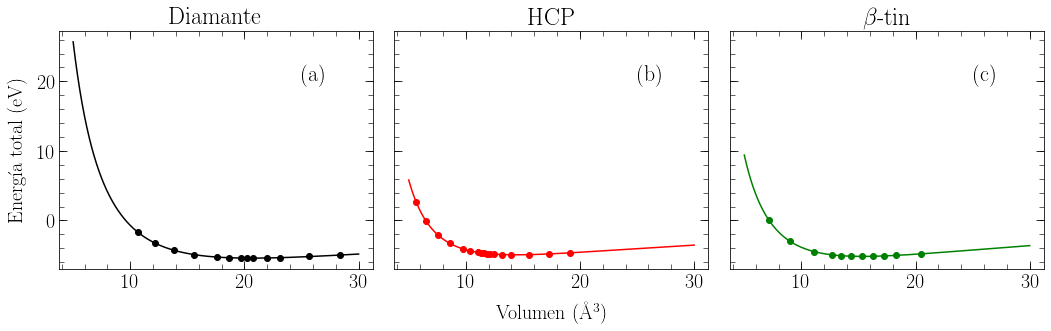

In [9]:
fig,axs=plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
axs[0].text(25,20,"(a)",fontsize=22)
axs[0].set_title(r'Diamante')
axs[0].plot(diamante["Volumen"][:-2],diamante["Energía total"][:-2],'ko',linestyle='None')
axs[0].plot(xfit,diam_fit,'k',linestyle='solid')
axs[0].set_ylabel('Energía total (eV)',labelpad=10)
axs[0].xaxis.set_major_locator(mticker.MultipleLocator(10));
axs[0].xaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[0].yaxis.set_major_locator(mticker.MultipleLocator(10));
axs[0].yaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[0].tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
axs[0].tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);

axs[1].set_title(r'HCP')
axs[1].text(25,20,"(b)",fontsize=22)
axs[1].plot(HCP["Volumen"],HCP["Energía total"],'ro',linestyle='None')
axs[1].plot(xfit,HCP_fit,'r',linestyle='solid')
axs[1].set_xlabel(r'Volumen (\AA$^3$)',labelpad=10)
axs[1].xaxis.set_major_locator(mticker.MultipleLocator(10));
axs[1].xaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[1].yaxis.set_major_locator(mticker.MultipleLocator(10));
axs[1].yaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[1].tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
axs[1].tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
    
axs[2].set_title(r'$\beta$-tin')
axs[2].text(25,20,"(c)",fontsize=22)
axs[2].plot(beta_tin["Volumen"][:-2],beta_tin["Energía total"][:-2],'go',linestyle='None')
axs[2].xaxis.set_major_locator(mticker.MultipleLocator(10));
axs[2].xaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[2].yaxis.set_major_locator(mticker.MultipleLocator(10));
axs[2].yaxis.set_minor_locator(mticker.MultipleLocator(2));
axs[2].tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
axs[2].tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
axs[2].plot(xfit,BT_fit,'g',linestyle='solid')

plt.tight_layout()
plt.savefig("punto5.eps",bbox_inches='tight')
plt.show()

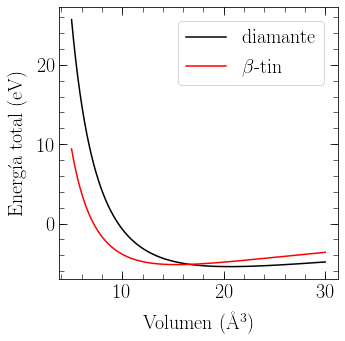

In [12]:
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111)
plt.plot(xfit,diam_fit,'k',linestyle='solid',label='diamante')
plt.plot(xfit,BT_fit,'r',linestyle='solid',label=r'$\beta$-tin')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right', borderaxespad=0.)
plt.ylabel('Energía total (eV)',labelpad=10)
plt.xlabel(r'Volumen (\AA$^3$)',labelpad=10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(10));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2));
ax.yaxis.set_major_locator(mticker.MultipleLocator(10));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(2));
ax.tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
ax.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.savefig("punto6b.eps",bbox_inches='tight')
plt.show()

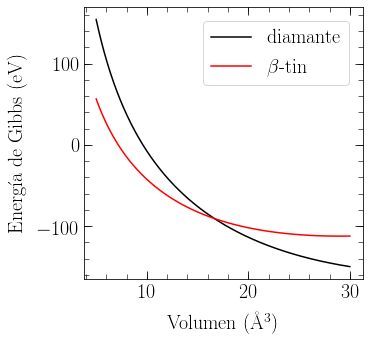

In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111)
plt.plot(xfit,diam_fit+diam_fit*xfit,'k',linestyle='solid',label='diamante')
plt.plot(xfit,BT_fit+BT_fit*xfit,'r',linestyle='solid',label=r'$\beta$-tin')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right', borderaxespad=0.)
plt.ylabel('Energía de Gibbs (eV)',labelpad=10)
plt.xlabel(r'Volumen (\AA$^3$)',labelpad=10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(10));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2));
ax.yaxis.set_major_locator(mticker.MultipleLocator(100));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(20));
ax.tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
ax.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.savefig("punto6.eps",bbox_inches='tight')
plt.show()


####  ftol=1e-08, xtol=1e-08, gtol=1e-08  #####

result =   active_mask: array([ 1, -1])
        cost: 90.32121442389982
         fun: array([ 1.28880786, 13.37839315])
        grad: array([-79.41072252,  14.37518453])
         jac: array([[-0.39283587,  0.00973452],
       [-5.89790057,  1.07356978]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 6
        njev: 6
  optimality: 3.762117674653093e-10
      status: 1
     success: True
           x: array([11., 20.])
result.x =  [11. 20.]



slope_common_tangent =  1.181188818722991
slope_common_tangent =  -0.10761903634169212


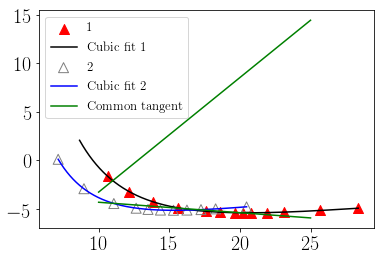

In [159]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
from sympy import *
import sympy as sym
import os
import pickle as pl
from scipy.optimize import least_squares


# Intial candidates for fit, per FU: - thus, the E vs V input data has to be per FU
E0_init = -5.4199
V0_init = 20.6127
B0_init = 0.5201
B0_prime_init = 4.0576

def fdiam_p(x):
    y=60.4416106992898*(-30.0711369976133*(1/x)**0.666666666666667 + 6.0)*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x + 246.990115799413*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x
    return y

def fbeta_p(x):
    y=49.0293439913502*(-24.7184631496109*(1/x)**0.666666666666667 + 6.0)*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x + 194.491709063869*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x
    return y

def equations(p):
    x1, x2 = p
    f1=Birch_Murnaghan(x1,poptdiam[0],poptdiam[1],poptdiam[2],poptdiam[3])
    f2=Birch_Murnaghan(x2,poptbeta[0],poptbeta[1],poptbeta[2],poptbeta[3])
    df1=fdiam_p(x1)
    df2=fbeta_p(x2)
    E1 = df1-df2
    E2 = df1*(x2-x1)-(f2-f1)
    return (E1, E2)

def comm_tangent(x, x1, slope_common_tangent):
    f1=Birch_Murnaghan(x1,poptdiam[0],poptdiam[1],poptdiam[2],poptdiam[3])
    return f1+slope_common_tangent*(x-x1)

# Data 1 (Red triangles): 
Vdiam= diamante["Volumen"].values
Ediam = diamante["Energía total"].values

# Data 14 (Empty grey triangles):
Vbeta=beta_tin["Volumen"][:-2].values
Ebeta=beta_tin["Energía total"][:-2].values

init_vals = [E0_init, V0_init, B0_init, B0_prime_init]
poptdiam, pcovdiam = optimize.curve_fit(Birch_Murnaghan, Vdiam, Ediam,p0=[1,1,15,1])
poptbeta, pcovbeta = optimize.curve_fit(Birch_Murnaghan, Vbeta, Ebeta,p0=[1,1,15,1])

# Linspace for plotting the fitting curves:
Vdiam_lin = np.linspace(Vdiam[0], Vdiam[-1], 10000)
Ediam_lin = Birch_Murnaghan(Vdiam_lin, poptdiam[0],poptdiam[1],poptdiam[2],poptdiam[3])
Vbeta_lin = np.linspace(Vbeta[0], Vbeta[-1], 10000)
Ebeta_lin = Birch_Murnaghan(Vbeta_lin,poptbeta[0],poptbeta[1],poptbeta[2],poptbeta[3])

lb = (10.0, 20.0)   # lower bounds on x1, x2
ub = (11, 22.0)   # upper bounds
result = least_squares(equations, [10, 22], bounds=(lb, ub))
result_tight_tols = least_squares(equations, [10, 22], ftol=1e-16, xtol=1e-16, gtol=1e-16, bounds=(lb, ub))

print( """
####  ftol=1e-08, xtol=1e-08, gtol=1e-08  #####
""")
print('result = ', result)
print( 'result.x = ', result.x)
print( """

""")
x1 = result.x[0]
x2 = result.x[1]
slope_common_tangent1 = fdiam_p(x1)
slope_common_tangent2 = fbeta_p(x2)
print ('slope_common_tangent = ', slope_common_tangent1)
print ('slope_common_tangent = ', slope_common_tangent2)

xp = np.linspace(10,25,100)
slope1=comm_tangent(xp, x1, slope_common_tangent1)
slope2=comm_tangent(xp, x2, slope_common_tangent2)

plt.figure()
# Plotting the scattered points: 
p1 = plt.scatter(V_C_I, E_C_I, color='red', marker="^", label='1', s=100)
p5 = plt.scatter(V_14, E_14, color='grey', marker="^", facecolors='none', label='2', s=100)
# Plotting the fitting curves:
p2, = plt.plot(V_C_I_lin, E_C_I_lin, color='black' )
p6, = plt.plot(V_14_lin, E_14_lin, 'b' )
# Plot common slope
pcomm_tangent1, = plt.plot(xp,slope1, 'green', label='Common tangent')
pcomm_tangent2, = plt.plot(xp,slope2, 'green', label='Common tangent')
#plt.ylim(-6,-4)

plt.legend((p1, p2, p5, p6, pcomm_tangent1,pcomm_tangent2), ("1", "Cubic fit 1", "2", 'Cubic fit 2', 'Common tangent'), prop=fontP)
plt.ticklabel_format(useOffset=False)


####  ftol=1e-12, xtol=1e-12, gtol=1e-12  #####

result_tight_tols =   active_mask: array([ 1, -1])
        cost: 0.03854509806557025
         fun: array([0.25592315, 0.10767329])
        grad: array([-0.06873398,  0.00687199])
         jac: array([[-0.06306658,  0.00973452],
       [-0.48845707,  0.04068508]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 13
        njev: 12
  optimality: 2.441921361039207e-16
      status: 3
     success: True
           x: array([17., 20.])
result_tight_tols.x =  [17. 20.]



x1= 16.999999999999996
x2= 20.000000000000004
slope_common_tangent =  0.1483041151895899
slope_common_tangent =  -0.10761903634159892


Text(0.5, 1.0, 'Lest Squares. Tightening tolerances: ftol=1e-12, xtol=1e-12, gtol=1e-12')

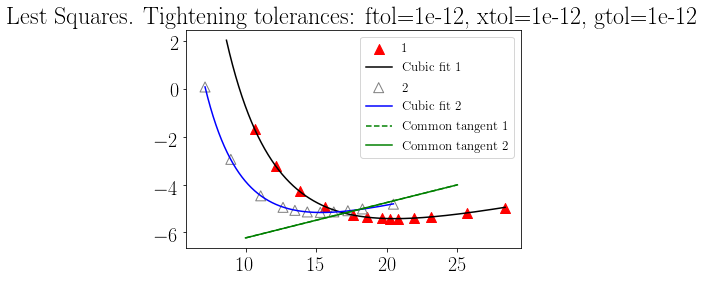

In [133]:
### Tighter tolerances:
print ("""
####  ftol=1e-12, xtol=1e-12, gtol=1e-12  #####
""")
print( 'result_tight_tols = ', result_tight_tols)
print( 'result_tight_tols.x = ', result_tight_tols.x)
print( """

""")
x1 = result_tight_tols.x[0]
x2 = result_tight_tols.x[1]

#slope_common_tangent = devBM(x1, popt_C_I[1], popt_C_I[2], popt_C_I[3])
slope_common_tangent = fdiam_p(x1)
slope_common_tangent2 = fbeta_p(x2)

slope2=comm_tangent(xp, x1, slope_common_tangent)

print("x1=",x1)
print("x2=",x2)
print( 'slope_common_tangent = ', slope_common_tangent)
print( 'slope_common_tangent = ', slope_common_tangent2)

plt.figure()
# Plotting the scattered points: 
p1 = plt.scatter(V_C_I, E_C_I, color='red', marker="^", label='1', s=100)
p5 = plt.scatter(V_14, E_14, color='grey', marker="^", facecolors='none', label='2', s=100)
# Plotting the fitting curves:
p2, = plt.plot(V_C_I_lin, E_C_I_lin, color='black' )
p6, = plt.plot(V_14_lin, E_14_lin, 'b' )
pcomm_tangent1, = plt.plot(xp, slope1, 'green',linestyle='dashed', label='Common tangent')
pcomm_tangent2, = plt.plot(xp, slope2, 'green', label='Common tangent')

plt.legend((p1, p2, p5, p6, pcomm_tangent1,pcomm_tangent2), ("1", "Cubic fit 1", "2", 'Cubic fit 2', 'Common tangent 1','Common tangent 2'), prop=fontP)
plt.title('ftol=1e-08, xtol=1e-08, gtol=1e-08')

plt.ticklabel_format(useOffset=False)

plt.title('Lest Squares. Tightening tolerances: ftol=1e-12, xtol=1e-12, gtol=1e-12')

In [83]:
%matplotlib inline


#### Using `fsolve`, but restricting the region:  ####


x1 =  16.357225242496717
x2 =  22.500816699804282
slope_common_tangent =  -0.038163027833531815
slope_common_tangent =  -0.03816302783351656


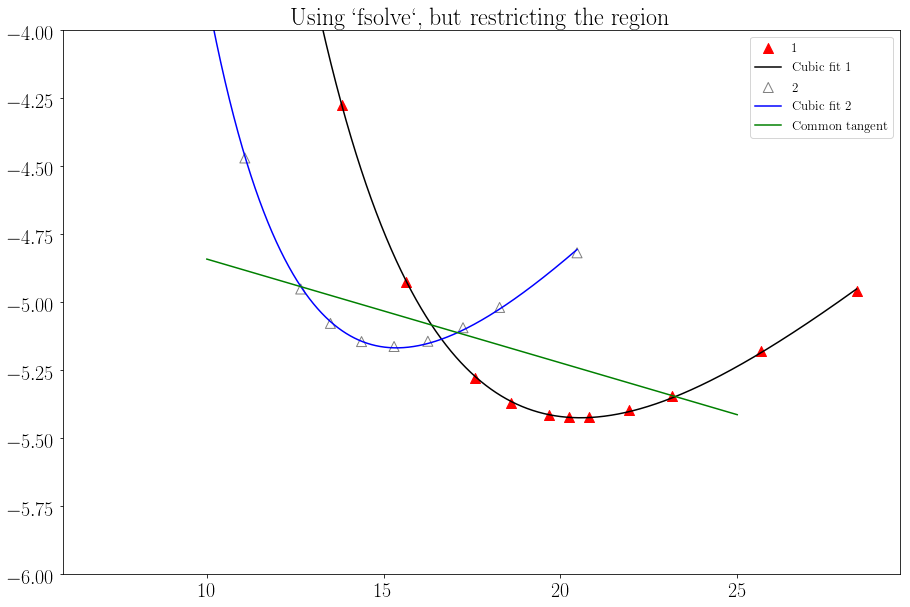

In [121]:
print("""
#### Using `fsolve`, but restricting the region:  ####

""")

from scipy.optimize import fsolve
x1, x2 =  fsolve(equations, (14, 20))

print('x1 = ', x1)
print('x2 = ', x2)

slope_common_tangent = fdiam_p(x2)
slope_common_tangent2 = fbeta_p(x1)
print('slope_common_tangent = ', slope_common_tangent)
print('slope_common_tangent = ', slope_common_tangent2)

plt.figure(figsize=(15,10))

# Plotting the fitting curves:
p2, = plt.plot(V_C_I_lin, E_C_I_lin, color='black' )
p6, = plt.plot(V_14_lin, E_14_lin, 'b' )

# xp = np.linspace(54, 68, 100)
pcomm_tangent, = plt.plot(xp, comm_tangent(xp, x1, slope_common_tangent), 'green', label='Common tangent')

# Plotting the scattered points: 
p1 = plt.scatter(V_C_I, E_C_I, color='red', marker="^", label='1', s=100)
p5 = plt.scatter(V_14, E_14, color='grey', marker="^", facecolors='none', label='2', s=100)

plt.ylim(-6,-4)
plt.legend((p1, p2, p5, p6, pcomm_tangent), ("1", "Cubic fit 1", "2", 'Cubic fit 2', 'Common tangent'), prop=fontP)
plt.ticklabel_format(useOffset=False)

plt.title('Using `fsolve`, but restricting the region')



plt.show()

In [185]:
import sympy as sym
from sympy import Symbol
from sympy.solvers import solve

In [267]:
x=Symbol('x')
fdiam=Birch_Murnaghan(x,diamparams[0],diamparams[1],diamparams[2],diamparams[3])
fdiam_prime=-fdiam.diff(x)
fbeta=Birch_Murnaghan(x,BTparams[0],BTparams[1],BTparams[2],BTparams[3])
fbeta_prime=-fbeta.diff(x)
gdiam=fdiam+fdiam_prime*x
gbeta=fbeta+fbeta_prime*x

In [186]:
sym.simplify(gdiam)

(-1817.54795569475*(1/x)**0.666666666666667 + 362.649664195739)*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667 + (-181.324832097869*(1/x)**0.666666666666667 + 36.1791771516177)*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**2.0 + 246.990115799413*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667 + 24.4668724848808*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**3.0 - 5.41994731532317

In [272]:
fbeta_prime

49.0293439913502*(-24.7184631496109*(1/x)**0.666666666666667 + 6.0)*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x + 194.491709063869*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x

In [269]:
def fdiam_p(x):
    return 60.4416106992898*(-30.0711369976133*(1/x)**0.666666666666667 + 6.0)*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x + 246.990115799413*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x

In [270]:
fdiam_p(16.6482)

0.17156403239418191

In [273]:
def fbeta_p(x):
    return 49.0293439913502*(-24.7184631496109*(1/x)**0.666666666666667 + 6.0)*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x + 194.491709063869*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x

In [274]:
fbeta_p(16.6482)

-0.04719779298523407

In [110]:
def P_diam(x):
    y=-60.4416106992898*(-30.0711369976133*(1/x)**0.666666666666667 + 6.0)*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x - 246.990115799413*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x
    return -y

def P_beta(x):
    y=-49.0293439913502*(-24.7184631496109*(1/x)**0.666666666666667 + 6.0)*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x - 194.491709063869*(6.17961578740273*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x
    return -y

In [194]:
def G_diam(x):
    return -x*(60.4416106992898*(-30.0711369976133*(1/x)**0.666666666666667 + 6.0)*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**1.0*(1/x)**0.666666666666667/x + 246.990115799413*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**2.0*(1/x)**0.666666666666667/x) + 6.02986285860294*(-30.0711369976133*(1/x)**0.666666666666667 + 6.0)*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**2.0 + 24.4668724848808*(7.51778424940333*(1/x)**0.666666666666667 - 1.0)**3.0 - 5.41994731532317

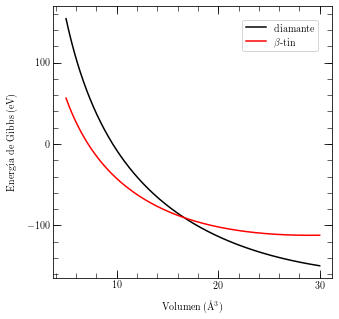

In [266]:
%matplotlib inline
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111)
plt.plot(xfit,diam_fit+diam_fit*xfit,'k',linestyle='solid',label='diamante')
# plt.plot(xfit,diam_fit+diam_fit*xfit,'k',linestyle='solid',label='diamante')
plt.plot(xfit,BT_fit+BT_fit*xfit,'r',linestyle='solid',label=r'$\beta$-tin')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right', borderaxespad=0.)
plt.ylabel('Energía de Gibbs (eV)',labelpad=10)
plt.xlabel(r'Volumen (\AA$^3$)',labelpad=10)
ax.xaxis.set_major_locator(mticker.MultipleLocator(10));
ax.xaxis.set_minor_locator(mticker.MultipleLocator(2));
ax.yaxis.set_major_locator(mticker.MultipleLocator(100));
ax.yaxis.set_minor_locator(mticker.MultipleLocator(20));
ax.tick_params(direction='in',which='major',length=8,bottom=True, top=True, left=True, right=True);
ax.tick_params(direction='in',which='minor',length=5,bottom=True, top=True, left=True, right=True);
plt.savefig("punto6.eps",bbox_inches='tight')
plt.show()

In [220]:
eps=diam_fit+diam_fit*xfit-(BT_fit+BT_fit*xfit)

In [221]:
for i in range(npts):
    if (eps[i] < 0.001) & (eps[i]>-0.001):
        print(xfit[i])

16.648116481164813
16.648366483664837


In [210]:
%matplotlib auto
plt.plot(xfit,eps)
plt.show()

Using matplotlib backend: Qt5Agg


In [230]:
x=Symbol('x')
E0D=Symbol('E0D')
B0D=Symbol('B0D')
V0D=Symbol('V0D')
B0pD=Symbol('B0pD')
E0b=Symbol('E0b')
B0b=Symbol('B0b')
V0b=Symbol('V0b')
B0pb=Symbol('B0pb')
Ediam=Birch_Murnaghan(x,E0D,B0D,V0D,B0pD)
dEdiam=-Ediam.diff(x)
Ebeta=Birch_Murnaghan(x,E0b,B0b,V0b,B0pb)
dEbeta=-Ebeta.diff(x)
fgdiam=Ediam+dEdiam*x
fgbeta=Ebeta+dEbeta*x

In [241]:
eps=fgdiam-fgbeta

In [242]:
sym.simplify(eps)

-0.5625*B0D*V0D*(V0D/x)**0.666666666666667*(-2.0*B0pD*((V0D/x)**0.666666666666667 - 1.0)**2.0 + ((V0D/x)**0.666666666666667 - 1.0)**1.0*(5.33333333333333*(V0D/x)**0.666666666666667 - 8.0) + 2.66666666666667*((V0D/x)**0.666666666666667 - 1.0)**2.0) + 0.5625*B0D*V0D*(B0pD*((V0D/x)**0.666666666666667 - 1.0)**3.0 - ((V0D/x)**0.666666666666667 - 1.0)**2.0*(4.0*(V0D/x)**0.666666666666667 - 6.0)) + 0.5625*B0b*V0b*(V0b/x)**0.666666666666667*(-2.0*B0pb*((V0b/x)**0.666666666666667 - 1.0)**2.0 + ((V0b/x)**0.666666666666667 - 1.0)**1.0*(5.33333333333333*(V0b/x)**0.666666666666667 - 8.0) + 2.66666666666667*((V0b/x)**0.666666666666667 - 1.0)**2.0) - 0.5625*B0b*V0b*(B0pb*((V0b/x)**0.666666666666667 - 1.0)**3.0 - ((V0b/x)**0.666666666666667 - 1.0)**2.0*(4.0*(V0b/x)**0.666666666666667 - 6.0)) + E0D - E0b

In [256]:
def feps(x,E0D,B0D,V0D,B0pD,E0b,B0b,V0b,B0pb):
    return -0.5625*B0D*V0D*(V0D/x)**0.666666666666667*(-2.0*B0pD*((V0D/x)**0.666666666666667 - 1.0)**2.0 + ((V0D/x)**0.666666666666667 - 1.0)**1.0*(5.33333333333333*(V0D/x)**0.666666666666667 - 8.0) + 2.66666666666667*((V0D/x)**0.666666666666667 - 1.0)**2.0) + 0.5625*B0D*V0D*(B0pD*((V0D/x)**0.666666666666667 - 1.0)**3.0 - ((V0D/x)**0.666666666666667 - 1.0)**2.0*(4.0*(V0D/x)**0.666666666666667 - 6.0)) + 0.5625*B0b*V0b*(V0b/x)**0.666666666666667*(-2.0*B0pb*((V0b/x)**0.666666666666667 - 1.0)**2.0 + ((V0b/x)**0.666666666666667 - 1.0)**1.0*(5.33333333333333*(V0b/x)**0.666666666666667 - 8.0) + 2.66666666666667*((V0b/x)**0.666666666666667 - 1.0)**2.0) - 0.5625*B0b*V0b*(B0pb*((V0b/x)**0.666666666666667 - 1.0)**3.0 - ((V0b/x)**0.666666666666667 - 1.0)**2.0*(4.0*(V0b/x)**0.666666666666667 - 6.0)) + E0D - E0b

In [247]:
neweps=feps(x,diamparams[0],diamparams[1],diamparams[2],diamparams[3],BTparams[0],BTparams[1],BTparams[2],BTparams[3])
simplifyeps=sym.simplify(neweps)

In [260]:
# import numpy as np
# from scipy.optimize import curve_fit
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# import sys
# from sympy import *
# import sympy as sym
# import os
# import pickle as pl


# # Intial candidates for fit, per FU: - thus, the E vs V input data has to be per FU
# E0_init = -941.510817926696  # -1882.50963222/2.0 
# V0_init = 63.54960592453 #125.8532/2.0 
# B0_init = 76.3746233515232 #74.49 
# B0_prime_init = 4.05340727164527 #4.15

# def BM(x, a, b, c, d):
#          return  a + b*x + c*x**2 + d*x**3 

# def devBM(x, b, c, d):
#          return  b + 2*c*x + 3*d*x**2 

# # Data 1 (Red triangles): 
# V_C_I, E_C_I = np.loadtxt('./1.dat', skiprows = 1).T

# # Data 14 (Empty grey triangles):
# V_14, E_14 = np.loadtxt('./2.dat', skiprows = 1).T

# init_vals = [E0_init, V0_init, B0_init, B0_prime_init]
# popt_C_I, pcov_C_I = curve_fit(BM, V_C_I, E_C_I, p0=init_vals)
# popt_14, pcov_14 = curve_fit(BM, V_14, E_14, p0=init_vals)


# def equations(p):
#     x1, x2 = p
#     E1 = devBM(x1, popt_C_I[1], popt_C_I[2], popt_C_I[3]) - devBM(x2, popt_14[1], popt_14[2], popt_14[3])
#     E2 = ((BM(x1, popt_C_I[0], popt_C_I[1], popt_C_I[2], popt_C_I[3]) - BM(x2, popt_14[0], popt_14[1], popt_14[2], popt_14[3])) / (x1 - x2)) - devBM(x1, popt_C_I[1], popt_C_I[2], popt_C_I[3])
#     return (E1, E2)

# from scipy.optimize import least_squares
# lb = (61.0, 59.0)   # lower bounds on x1, x2
# ub = (62.0, 60.0)   # upper bounds
# result = least_squares(equations, [61, 59], bounds=(lb, ub))
# result_tight_tols = least_squares(equations, [61, 59], ftol=1e-12, xtol=1e-12, gtol=1e-12, bounds=(lb, ub))

# print """
# ####  ftol=1e-08, xtol=1e-08, gtol=1e-08  #####
# """
# print 'result = ', result
# print 'result.x = ', result.x
# print """

# """
# x1 = result.x[0]
# x2 = result.x[1]

# slope_common_tangent = devBM(x1, popt_C_I[1], popt_C_I[2], popt_C_I[3])
# print 'slope_common_tangent = ', slope_common_tangent

# def comm_tangent(x, x1, slope_common_tangent):
#    return BM(x1, popt_C_I[0], popt_C_I[1], popt_C_I[2], popt_C_I[3]) - slope_common_tangent * x1 + slope_common_tangent * x

# # Linspace for plotting the fitting curves:
# V_C_I_lin = np.linspace(V_C_I[0]-2, V_C_I[-1], 10000)
# V_14_lin = np.linspace(V_14[0], V_14[-1]+2, 10000)


# plt.figure()

-5.136242080180033

In [71]:
help(least_squares)

Help on function least_squares in module scipy.optimize._lsq.least_squares:

least_squares(fun, x0, jac='2-point', bounds=(-inf, inf), method='trf', ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None, tr_options={}, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})
    Solve a nonlinear least-squares problem with bounds on the variables.
    
    Given the residuals f(x) (an m-dimensional real function of n real
    variables) and the loss function rho(s) (a scalar function), `least_squares`
    finds a local minimum of the cost function F(x)::
    
        minimize F(x) = 0.5 * sum(rho(f_i(x)**2), i = 0, ..., m - 1)
        subject to lb <= x <= ub
    
    The purpose of the loss function rho(s) is to reduce the influence of
    outliers on the solution.
    
    Parameters
    ----------
    fun : callable
        Function which computes the vector of residuals, with the signature
        ``fun(x, *args, **kwarg